# Spotify Dataset 1922-2021, ~600k Tracks
## by Abdulrahman Yaseen

## Preliminary Wrangling

> Audio features of ~600k songs released in between 1922 and 2021 (A Kaggle Dataset)

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv(r"C:\Users\hp\Desktop\project advanced\spotify data\tracks.csv")
df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [3]:
#overview of data shape and composition
print(df.shape)
print(df.info())

(586672, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  livenes

In [4]:
df.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,586672.000000,5.866720e+05,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000
mean,27.570053,2.300512e+05,0.044086,0.563594,0.542036,5.221603,-10.206067,0.658797,0.104864,0.449863,0.113451,0.213935,0.552292,118.464857,3.873382
std,18.370642,1.265261e+05,0.205286,0.166103,0.251923,3.519423,5.089328,0.474114,0.179893,0.348837,0.266868,0.184326,0.257671,29.764108,0.473162
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1.750930e+05,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.600000,4.000000
50%,27.000000,2.148930e+05,0.000000,0.577000,0.549000,5.000000,-9.243000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.384000,4.000000
75%,41.000000,2.638670e+05,0.000000,0.686000,0.748000,8.000000,-6.482000,1.000000,0.076300,0.785000,0.009550,0.278000,0.769000,136.321000,4.000000
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000


In [5]:
# Check for duplicates
df.duplicated().value_counts()

False    586672
dtype: int64

#### Outputs (Assessment Summary):
##### Quality aspects:
completeness issues:

- 71 Tracks without names as NaNs
- 71 Tracks without names as "['']"

Data types (consistency issues):

- The release date column is not in date format.

#### Cleaning

In [6]:
# Copying dataset
df_clean = df.copy()

#### Define

- replace "['']" with NaNs
- Change date column to date format.


#### Code

In [7]:
#[''] will be replaced with NaNs.
df_clean.artists = df_clean.artists.replace("['']",np.nan)

In [8]:
#Change date column to date format.
df_clean['release_date'] = pd.to_datetime(df_clean['release_date'])

#### Test

In [9]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                586672 non-null  object        
 1   name              586601 non-null  object        
 2   popularity        586672 non-null  int64         
 3   duration_ms       586672 non-null  int64         
 4   explicit          586672 non-null  int64         
 5   artists           586601 non-null  object        
 6   id_artists        586672 non-null  object        
 7   release_date      586672 non-null  datetime64[ns]
 8   danceability      586672 non-null  float64       
 9   energy            586672 non-null  float64       
 10  key               586672 non-null  int64         
 11  loudness          586672 non-null  float64       
 12  mode              586672 non-null  int64         
 13  speechiness       586672 non-null  float64       
 14  acou

### What is the structure of your dataset?

> There are 586672 tracks in the dataset with 19 features

Numerical:
- acousticness (Ranges from 0 to 1)
- danceability (Ranges from 0 to 1)
- energy (Ranges from 0 to 1)
- duration_ms (Integer typically ranging from 200k to 300k)
- instrumentalness (Ranges from 0 to 1)
- valence (Ranges from 0 to 1)
- popularity (Ranges from 0 to 100)
- tempo (Float typically ranging from 50 to 150)
- liveness (Ranges from 0 to 1)
- loudness (Float typically ranging from -60 to 0)
- speechiness (Ranges from 0 to 1)

Dummy:

- mode (0 = Minor, 1 = Major)
- explicit (0 = No explicit content, 1 = Explicit content)

Categorical:

- key (All keys on octave encoded as values ranging from 0 to 11, starting on C as 0, C# as 1 and so on…)
- timesignature (The predicted timesignature, most typically 4)
- artists (List of artists mentioned)
- artists (Ids of mentioned artists)
- release_date (Date of release mostly in yyyy-mm-dd format, however precision of date may vary)
- name (Name of the song)

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figuring out what features are best for predicting the popularity of the tracks in the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that energy and liveness will have the strongest effect on each track's popularity.

## Univariate Exploration

> I'll start by looking at the distribution of the main variable of interest: popularity.

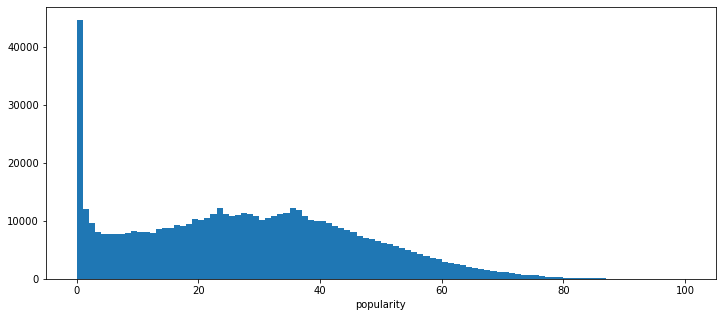

In [10]:
# start with a standard-scaled plot
binsize = 1
bins = np.arange(0, df_clean['popularity'].max()+binsize, binsize)

plt.figure(figsize=[12, 5])
plt.hist(data = df_clean, x = 'popularity', bins = bins)
plt.xlabel('popularity')
plt.show()

> The popularity is calculated on the total number of plays the track has had and how recent those plays are.
So it's reasonable that most of the tracks have a popularity of zero, and zero tracks have a popularity of 100

Next up, one predictor variable of interest: duration.

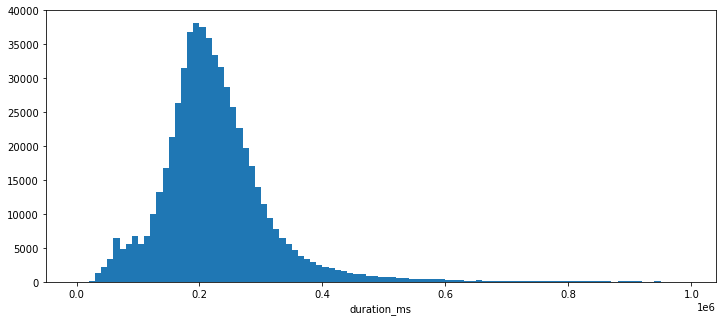

In [11]:
# start with a standard-scaled plot
bins = np.arange(0, 1000000, 10000)

plt.figure(figsize=[12, 5])
plt.hist(data = df_clean, x = 'duration_ms', bins = bins)
plt.xlabel('duration_ms')
plt.show()

> The durations ranges from 100,000 ms to 500,000 ms with large freq at duration of 200,000 ms (3.3 minutes)

Now let's look at energy, loudness and danceability

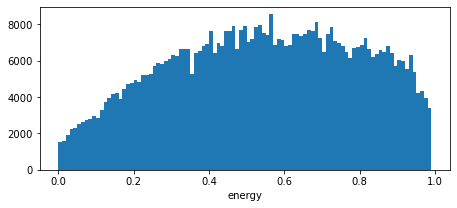

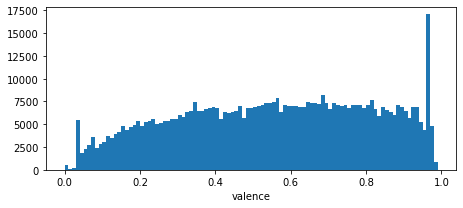

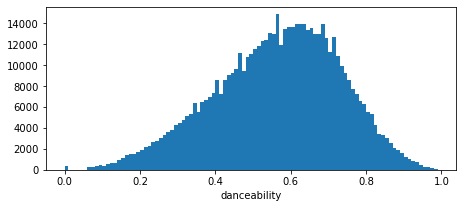

In [12]:
# Standard scaled 3 plots 
# subplot 1 for energy
plt.figure(figsize = [25, 3])
plt.subplot(1, 3, 1)
bins = np.arange(0, 1, 0.01)
plt.hist(data = df_clean, x = 'energy', bins = bins)
plt.xlabel('energy')
plt.show()

# subplot 1 for valence
plt.figure(figsize = [25, 3])
plt.subplot(1, 3, 2)
bins = np.arange(0, 1, 0.01)
plt.hist(data = df_clean, x = 'valence', bins = bins)
plt.xlabel('valence')
plt.show()

# subplot 1 for danceability
plt.figure(figsize = [25, 3])
plt.subplot(1, 3, 3)
bins = np.arange(0, 1, 0.01)
plt.hist(data = df_clean, x = 'danceability', bins = bins)
plt.xlabel('danceability')
plt.show()

> The features of interset varies from 0 to 1 

Now let's see every year's release 

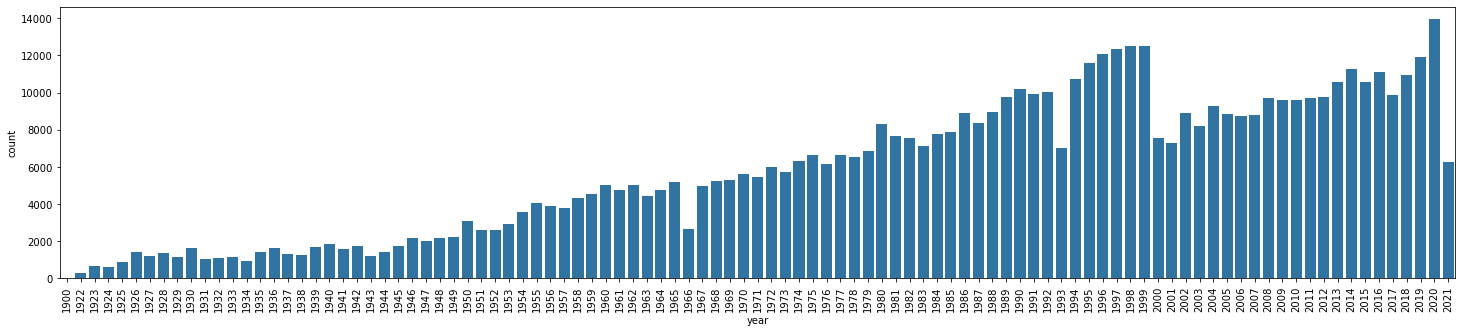

In [13]:
# Return the Series having unique values
df_clean['year'] = df_clean['release_date'].dt.year
base_color = sb.color_palette()[0]
plt.figure(figsize = [25, 5])
plt.xticks(rotation=90)

# Use the `color` argument
sb.countplot(data=df_clean, x='year', color=base_color);

> The production of songs is increasing over years

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The popularity is right skewed as the popularity is calculated on the total number of plays the track has had and how recent those plays are. So it's reasonable that most of the tracks have a popularity of zero, and zero tracks have a popularity of 100

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> No unusual distributions

## Bivariate Exploration

> To start off with, I want to look at the pairwise correlations present between features in the data.

In [14]:
numeric_vars = ['acousticness', 'danceability', 'energy', 'duration_ms', 'instrumentalness', 'valence', 'popularity','tempo',
                'liveness','loudness','speechiness']
categoric_vars = ['key', 'time_signature','explicit','mode']

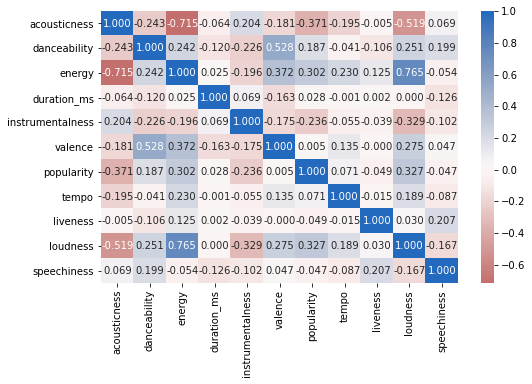

In [15]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(df_clean[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

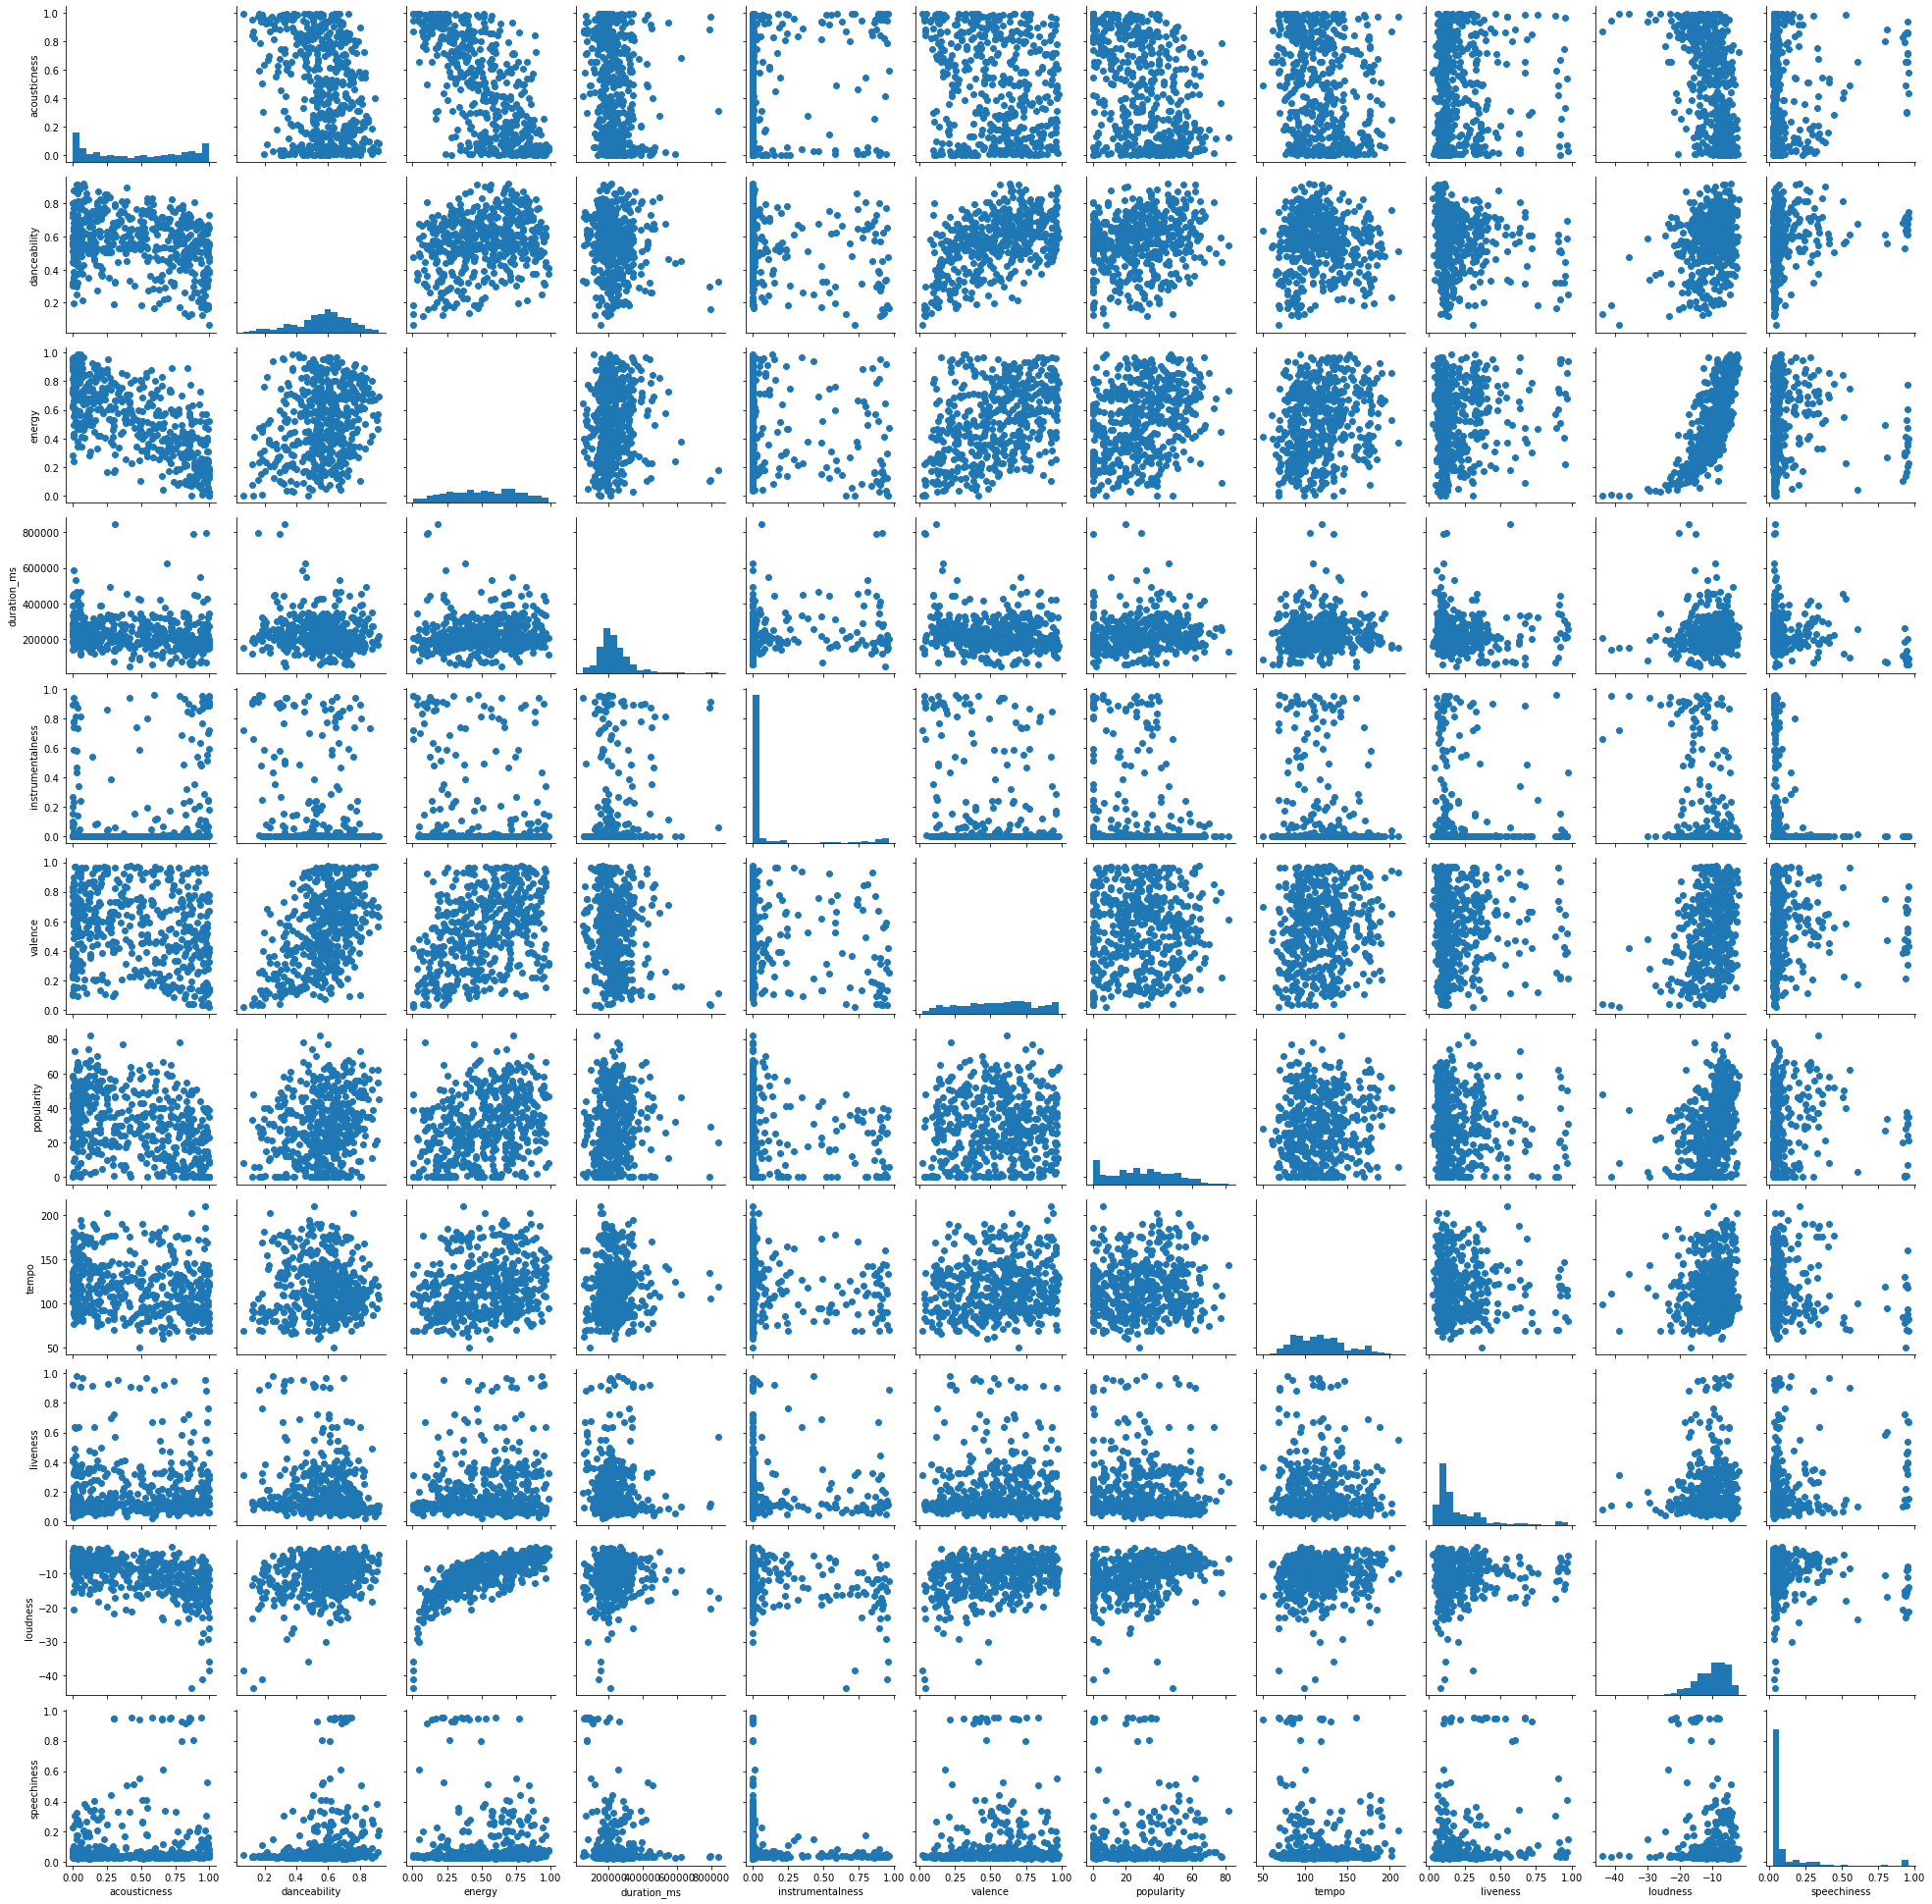

In [16]:
# plot matrix: sample 500 Track so that plots are clearer and
# they render faster
samples = np.random.choice(df_clean.shape[0], 500, replace = False)
df_clean_samp = df_clean.loc[samples,:]

g = sb.PairGrid(data = df_clean_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

> Loudness & energy have good relation with popularity

C:\Users\hp\anaconda3\lib\site-packages\seaborn\axisgrid.py:1150: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only val

<Figure size 720x720 with 0 Axes>

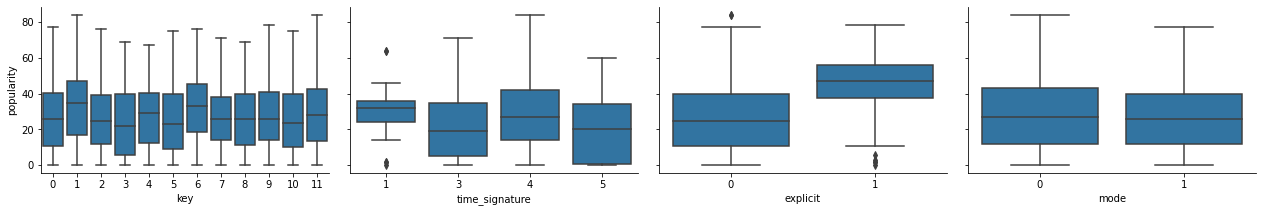

In [17]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.

samples = np.random.choice(df_clean.shape[0], 2000, replace = False)
df_clean_samp = df_clean.loc[samples,:]

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = df_clean_samp, y_vars = ['popularity'], x_vars = categoric_vars,
                size = 3, aspect = 1.5)
g.map(boxgrid)
plt.show();

> The only positive relationship for the categorical features is the explicit features (the more explicit the more popular) while the other features have no obvious relationship

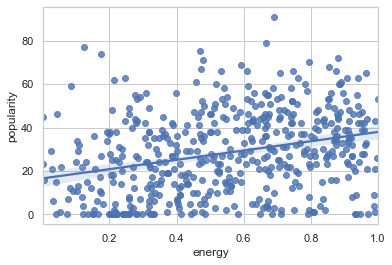

In [32]:
#Scatter between energy and popularity 
sb.regplot(data = df_clean.sample(500), x = 'energy', y = 'popularity');


> The more energy the more popular

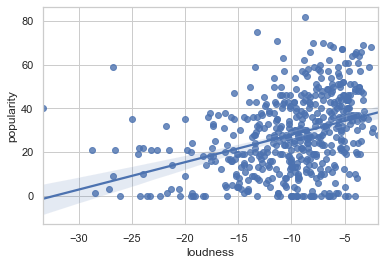

In [33]:
#Scatter between loudness and popularity 
sb.regplot(data = df_clean.sample(500), x = 'loudness', y = 'popularity');


> The more energy the more popular!

Text(0.5, 0, 'Year')

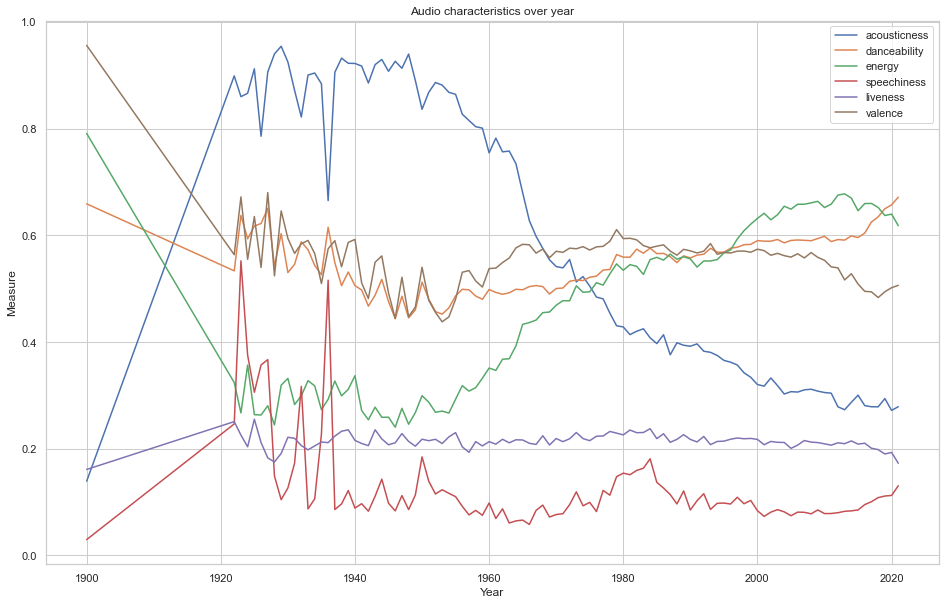

In [20]:
# Audio characteristics over year
plt.figure(figsize=(16, 10))
sb.set(style="whitegrid")
columns = ["acousticness","danceability","energy","speechiness","liveness","valence"]
for col in columns:
    x = df_clean.groupby("year")[col].mean()
    ax= sb.lineplot(x=x.index,y=x,label=col)
ax.set_title('Audio characteristics over year')
ax.set_ylabel('Measure')
ax.set_xlabel('Year')

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Tracks have become more Energetic and Danceable in the recent years. The loudness and tempo has also increased.
The tracks have become less "Acoustic" Also the more energetic and loud the more popular

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Valence and Danceability are highly related and so is speechiness and Danceability

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [34]:
df_clean['loudness_range'] = pd.qcut(df_clean['loudness'], q=4)

[Text(0.5, 1.0, '...danceability...')]

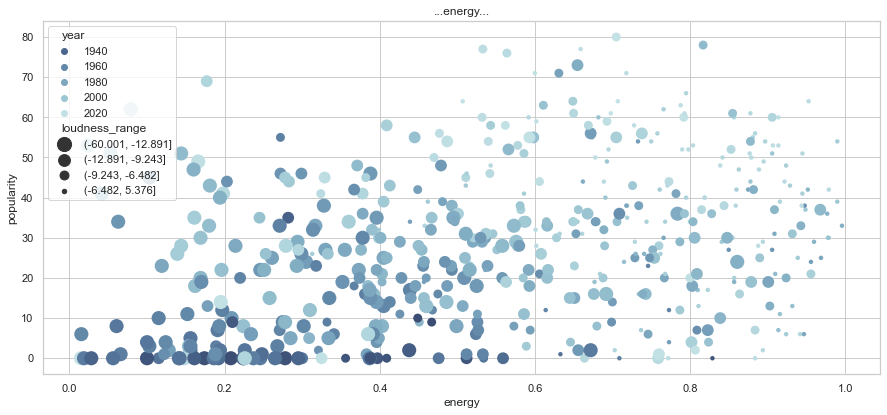

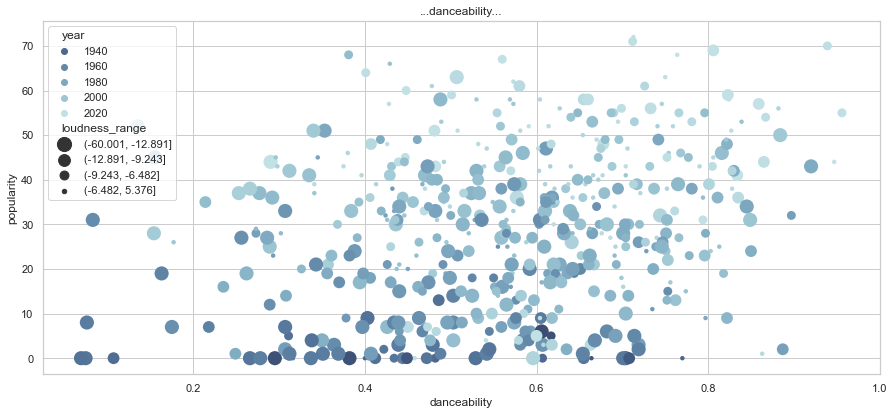

In [37]:
# "popularity VS "energy" by "years" and with size "loudness_range"
plt.subplots(1,1,figsize=(15, 6.5))
sb.scatterplot(x="energy", y="popularity",
                hue="year", size="loudness_range",
                palette="ch:r=-.2,d=.3_r",
                sizes=(20, 200), linewidth=0,
                data=df_clean.sample(500)).set(title='...energy...')

# "popularity VS "danceability" by "years" and with size "loudness_range"
plt.subplots(1,1,figsize=(15, 6.5))
sb.scatterplot(x="danceability", y="popularity",
                hue="year", size="loudness_range",
                palette="ch:r=-.2,d=.3_r",
                sizes=(20, 200), linewidth=0,
                data=df_clean.sample(500)).set(title='...danceability...')

> Over Years songs are getting louder and the louder the more popular, energitic and the more danceable

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Over Years songs are getting louder and the louder the more popular, energitic and the more danceable

### Were there any interesting or surprising interactions between features?

> No it makes sense